In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [03:28<00:00, 144.08image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomPosterize(bits=4, p=0.1),
    transforms.RandomSolarize(threshold=128, p=0.1),
    transforms.RandomEqualize(p=0.1),
    transforms.ToTensor()
    # Add any additional preprocessing steps here
])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    # new_input.show()
    # break
    train_subset.dataset.data[idx] = (new_input, label)
    



100%|██████████| 21000/21000 [05:06<00:00, 68.51it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

model = models.OccModel()
training_info = model.train_model(train, test, epochs=50, early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:49<00:00,  1.94it/s]


Loss: 0.007421, Mean Absolute Error: 0.07199193610552143, Time remaining: 2:30:56.069113


Epoch 2/50 (Training): 100%|██████████| 329/329 [02:06<00:00,  2.59it/s]


Loss: 0.000922, Mean Absolute Error: 0.0606404161873333, Time remaining: 2:10:53.095104


Epoch 3/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000667, Mean Absolute Error: 0.05519988039072524, Time remaining: 2:03:30.012292


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000521, Mean Absolute Error: 0.05296933076324615, Time remaining: 2:11:14.799386


Epoch 5/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000423, Mean Absolute Error: 0.047578025946116195, Time remaining: 2:04:33.403350


Epoch 6/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000325, Mean Absolute Error: 0.050348216112940866, Time remaining: 1:59:14.941860


Epoch 7/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000335, Mean Absolute Error: 0.04786203627256637, Time remaining: 1:54:47.904862


Epoch 8/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000278, Mean Absolute Error: 0.05233002929611409, Time remaining: 1:50:49.625472


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.000383, Mean Absolute Error: 0.04914708512815389, Time remaining: 1:52:15.322642


Epoch 10/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000234, Mean Absolute Error: 0.04484657237821437, Time remaining: 1:48:16.113760


Epoch 11/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.000231, Mean Absolute Error: 0.046194789277270755, Time remaining: 1:44:34.369101


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000315, Mean Absolute Error: 0.04581099821928334, Time remaining: 1:44:34.801870


Epoch 13/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000272, Mean Absolute Error: 0.04427494772491937, Time remaining: 1:40:53.489932


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000241, Mean Absolute Error: 0.04245325492972389, Time remaining: 1:40:12.764964


Epoch 15/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000159, Mean Absolute Error: 0.03701644726692045, Time remaining: 1:36:35.159580


Epoch 16/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.000105, Mean Absolute Error: 0.03773750444041922, Time remaining: 1:33:07.598352


Epoch 17/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000073, Mean Absolute Error: 0.035467604056317756, Time remaining: 1:29:46.623198


Epoch 18/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000077, Mean Absolute Error: 0.03857536809122626, Time remaining: 1:26:31.350592


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.68it/s]


Loss: 0.000152, Mean Absolute Error: 0.0426417359725592, Time remaining: 1:25:08.829481


Epoch 20/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000228, Mean Absolute Error: 0.0407945463394231, Time remaining: 1:21:54.930180


Epoch 21/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000122, Mean Absolute Error: 0.03416168103192715, Time remaining: 1:18:45.529410


Epoch 22/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000072, Mean Absolute Error: 0.038335785289552615, Time remaining: 1:15:40.171832


Epoch 23/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000085, Mean Absolute Error: 0.03657044769522357, Time remaining: 1:12:38.388951


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.000078, Mean Absolute Error: 0.03425902834637685, Time remaining: 1:10:51.631852


Epoch 25/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000050, Mean Absolute Error: 0.03282267037541308, Time remaining: 1:07:49.846725


Epoch 26/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000038, Mean Absolute Error: 0.032218942062017766, Time remaining: 1:04:50.936736


Epoch 27/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000040, Mean Absolute Error: 0.03810973400051924, Time remaining: 1:01:54.450228


Epoch 28/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000051, Mean Absolute Error: 0.03385349613753088, Time remaining: 0:59:00.167884


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.000050, Mean Absolute Error: 0.03375781402784459, Time remaining: 0:56:56.053242


Epoch 30/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000042, Mean Absolute Error: 0.03172520591699062, Time remaining: 0:54:01.949620


Epoch 31/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000029, Mean Absolute Error: 0.03145277332712678, Time remaining: 0:51:09.645168


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000026, Mean Absolute Error: 0.031539092642909036, Time remaining: 0:48:56.071782


Epoch 33/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000027, Mean Absolute Error: 0.03295094143361487, Time remaining: 0:46:03.882372


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000026, Mean Absolute Error: 0.0319315274246037, Time remaining: 0:43:44.270176


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000033, Mean Absolute Error: 0.034372195224971216, Time remaining: 0:41:20.603055


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.000029, Mean Absolute Error: 0.031115856388227104, Time remaining: 0:38:54.747786


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.000024, Mean Absolute Error: 0.03083997885102129, Time remaining: 0:36:25.103596


Epoch 38/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000023, Mean Absolute Error: 0.031841041034761264, Time remaining: 0:33:29.841396


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000020, Mean Absolute Error: 0.031146591638234702, Time remaining: 0:30:54.778354


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000022, Mean Absolute Error: 0.03150724105418046, Time remaining: 0:28:16.814450


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000023, Mean Absolute Error: 0.03141698593947482, Time remaining: 0:25:36.239817


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000021, Mean Absolute Error: 0.03175177249780044, Time remaining: 0:22:53.278680


Epoch 43/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000021, Mean Absolute Error: 0.030964837201494486, Time remaining: 0:20:08.090401


Epoch 44/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.000017, Mean Absolute Error: 0.03213339718058705, Time remaining: 0:17:20.921298


Epoch 45/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.000017, Mean Absolute Error: 0.030481452409653588, Time remaining: 0:14:24.287265


Epoch 46/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000016, Mean Absolute Error: 0.03097272027244276, Time remaining: 0:11:34.773884


Epoch 47/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000017, Mean Absolute Error: 0.031350439236043616, Time remaining: 0:08:43.490133


Epoch 48/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000016, Mean Absolute Error: 0.03099138170797774, Time remaining: 0:05:50.541798


Epoch 49/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.000016, Mean Absolute Error: 0.031407062122796446, Time remaining: 0:02:56.023882


Epoch 50/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.000016, Mean Absolute Error: 0.030854007476901122, Time remaining: 0:00:00


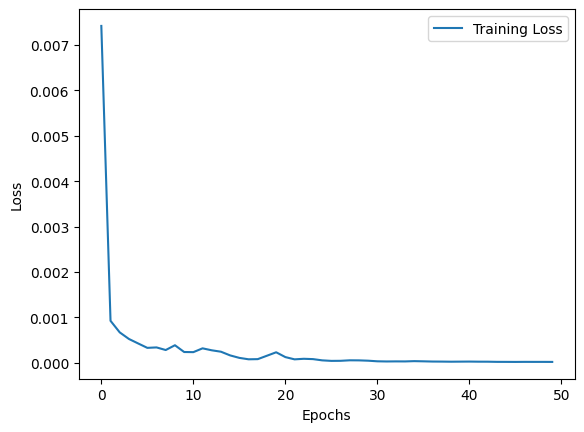

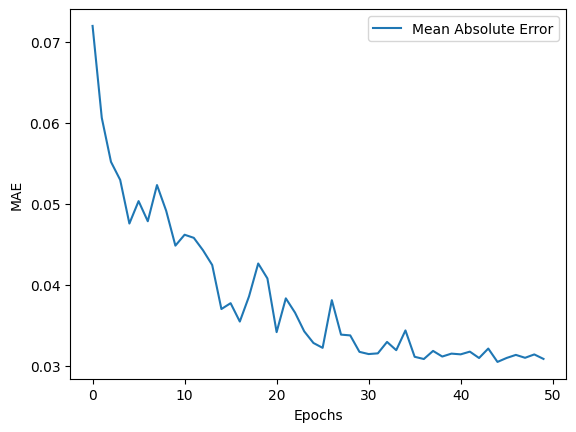

In [8]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:14<00:00,  6.50it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.011569904163479805, 0.009638295508921146, 0.017070556059479713, 0.03776128590106964, 0.013132287189364433, 0.04188006371259689, 0.0070587643422186375, 0.030575552955269814, 0.01090991124510765, 0.006407319568097591, 0.030476039275527, 0.03591404855251312, 0.031550291925668716, 0.04514528438448906, 0.02023957669734955, 0.015049944631755352, 0.052469562739133835, 0.03239614889025688, 0.14259162545204163, 0.015244639478623867, 0.016169628128409386, 0.022665174677968025, 0.028883837163448334, 0.05344352871179581, 0.026826027780771255, 0.03233214095234871, 0.017972245812416077, 0.02866644598543644, 0.009616910479962826, 0.01168953999876976, 0.044242098927497864, 0.05667794495820999, 0.08362135291099548, 0.09249304234981537, 0.016871122643351555, 0.016387227922677994, 0.00910832080990076, 0.013869541697204113, 0.03760722652077675, 0.020757459104061127, 0.11802468448877335, 0.015076583251357079, 0.015516016632318497, 0.011223357170820236, 0.010068108327686787, 0.014028800651431084, 0.02832

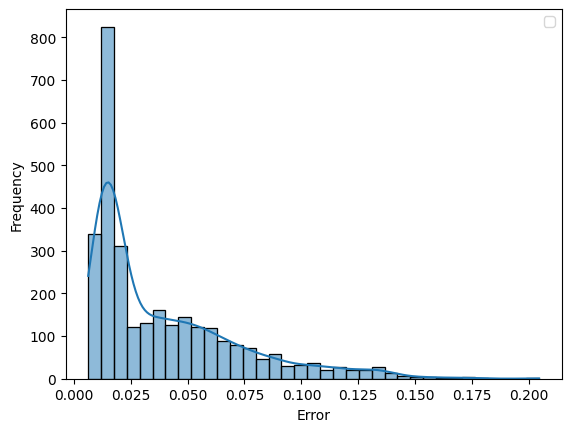

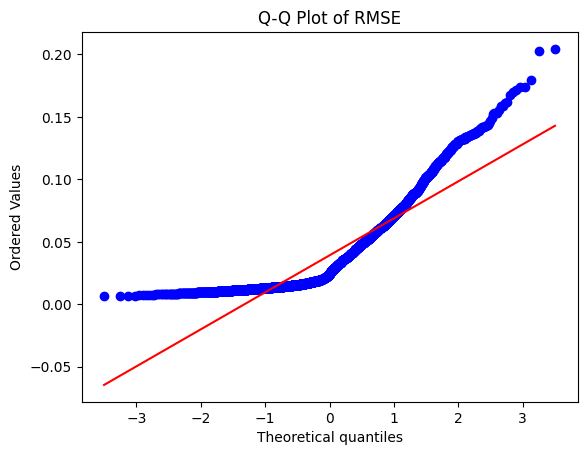

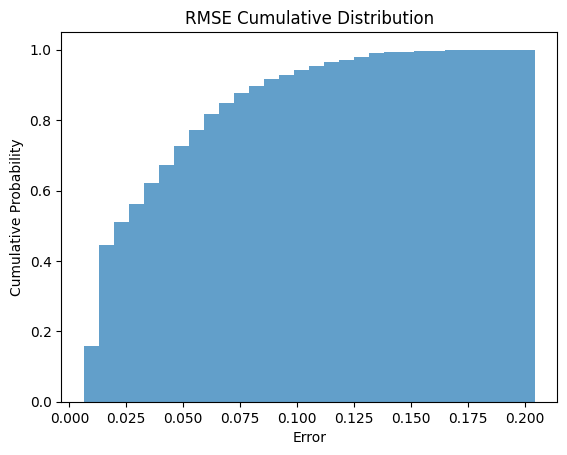

(3000, 21, 3)


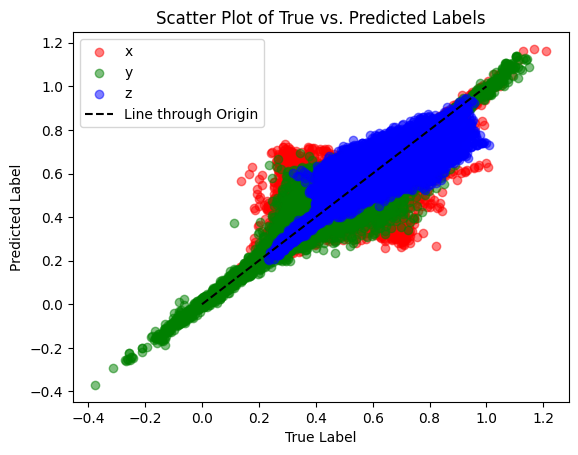

In [9]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [10]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [11]:
old_model = model

tensor([[0.3902, 0.6631, 0.6810],
        [0.4236, 0.5924, 0.6916],
        [0.4333, 0.5450, 0.6934],
        [0.4805, 0.5001, 0.6940],
        [0.5349, 0.4340, 0.6983],
        [0.4778, 0.4874, 0.7010],
        [0.5107, 0.4499, 0.7121],
        [0.5456, 0.4365, 0.7232],
        [0.5927, 0.4293, 0.7333],
        [0.5017, 0.4944, 0.7101],
        [0.5533, 0.4590, 0.7213],
        [0.5905, 0.4391, 0.7284],
        [0.6239, 0.4305, 0.7515],
        [0.5229, 0.5338, 0.7090],
        [0.5568, 0.4878, 0.7073],
        [0.5923, 0.4732, 0.7242],
        [0.6181, 0.4494, 0.7382],
        [0.5344, 0.5717, 0.7012],
        [0.5635, 0.5431, 0.7137],
        [0.5939, 0.5184, 0.7238],
        [0.6134, 0.4845, 0.7306]], device='cuda:0', grad_fn=<SelectBackward0>)


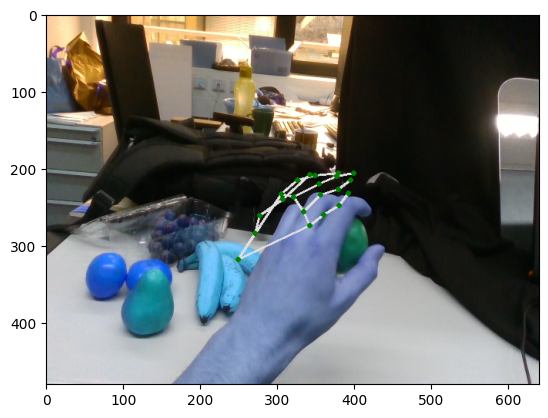

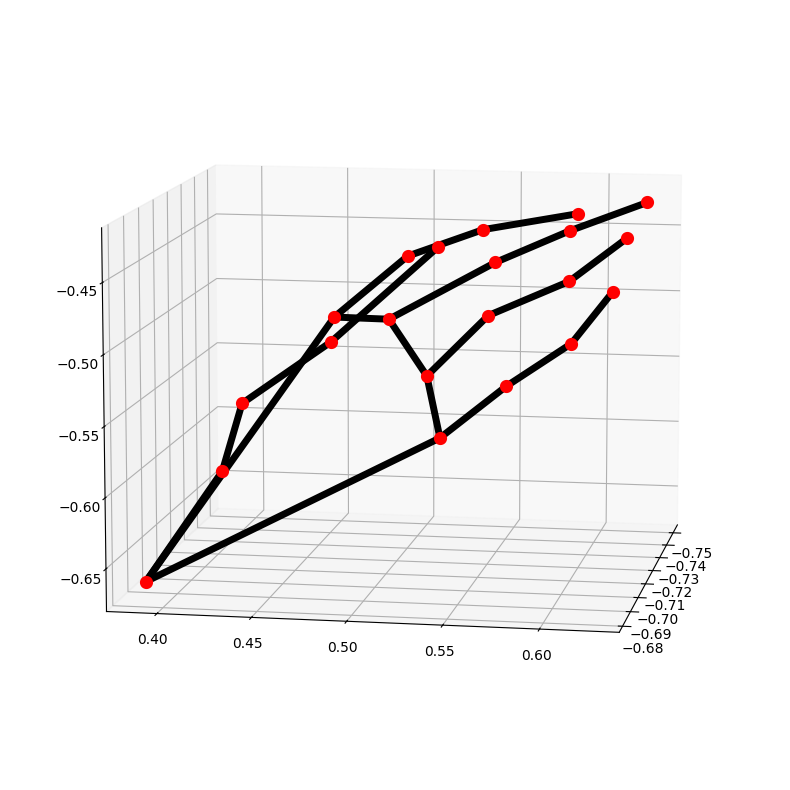

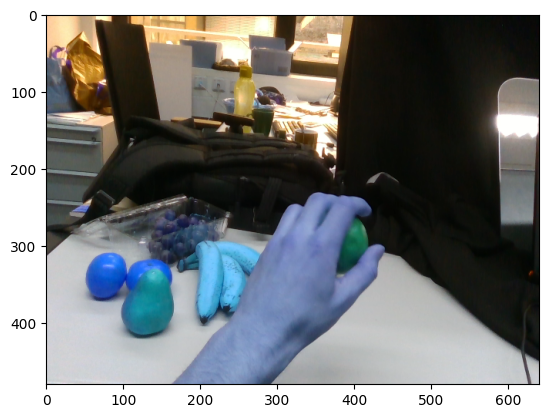

In [23]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

# reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00009999.jpg"
file = "/home/devcontainers/third-year-project/data/EgoDexter/data/Fruits/color/image_00190_color.png"
image = Image.open(file)

# model = models.OccModel().to(device)

# model.load_state_dict(torch.load("models/points_20240103-024547.pt"))
# model.load_state_dict(torch.load("models/points_20240104-022118.pt"))
# model = old_model
model.eval()
transform = transforms.Compose({
    transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))

print(joints[0])

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

# img = cv2.imread(file)
img2 = cv2.imread(file)
# img2 = cv2.resize(img2, (224,224))
# mp_drawing.draw_landmarks(
#             img,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
# plt.imshow(img)
# plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))